### Image

#### Image is made up of large number of pixels. Pixels are the small sqaures with RGB depth. Each pixel has its own combination of RGB values ranging from 0 to 255 (O being the least depth of the color).

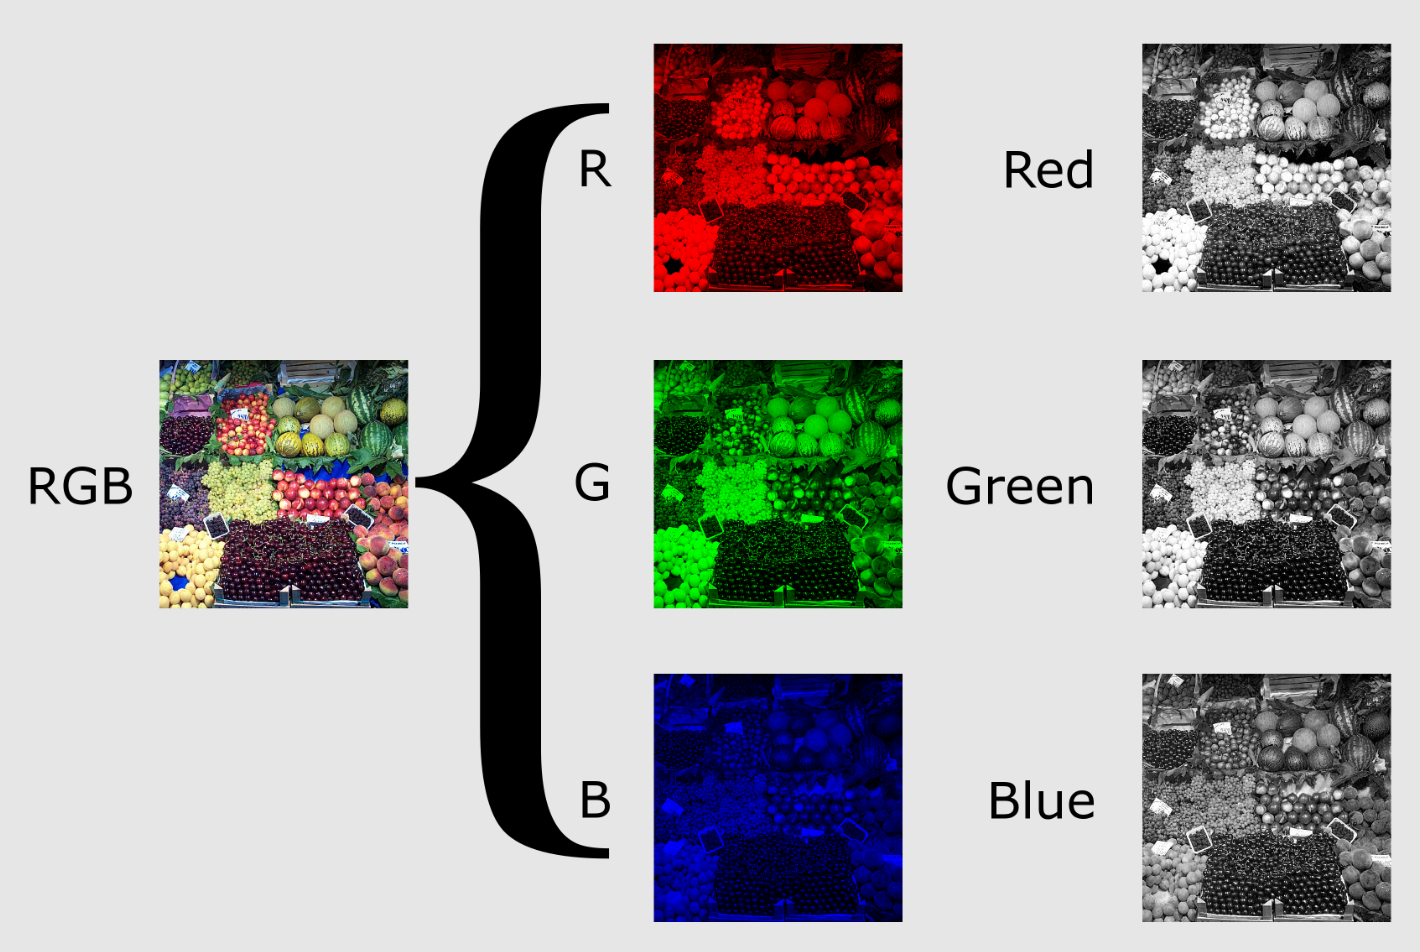

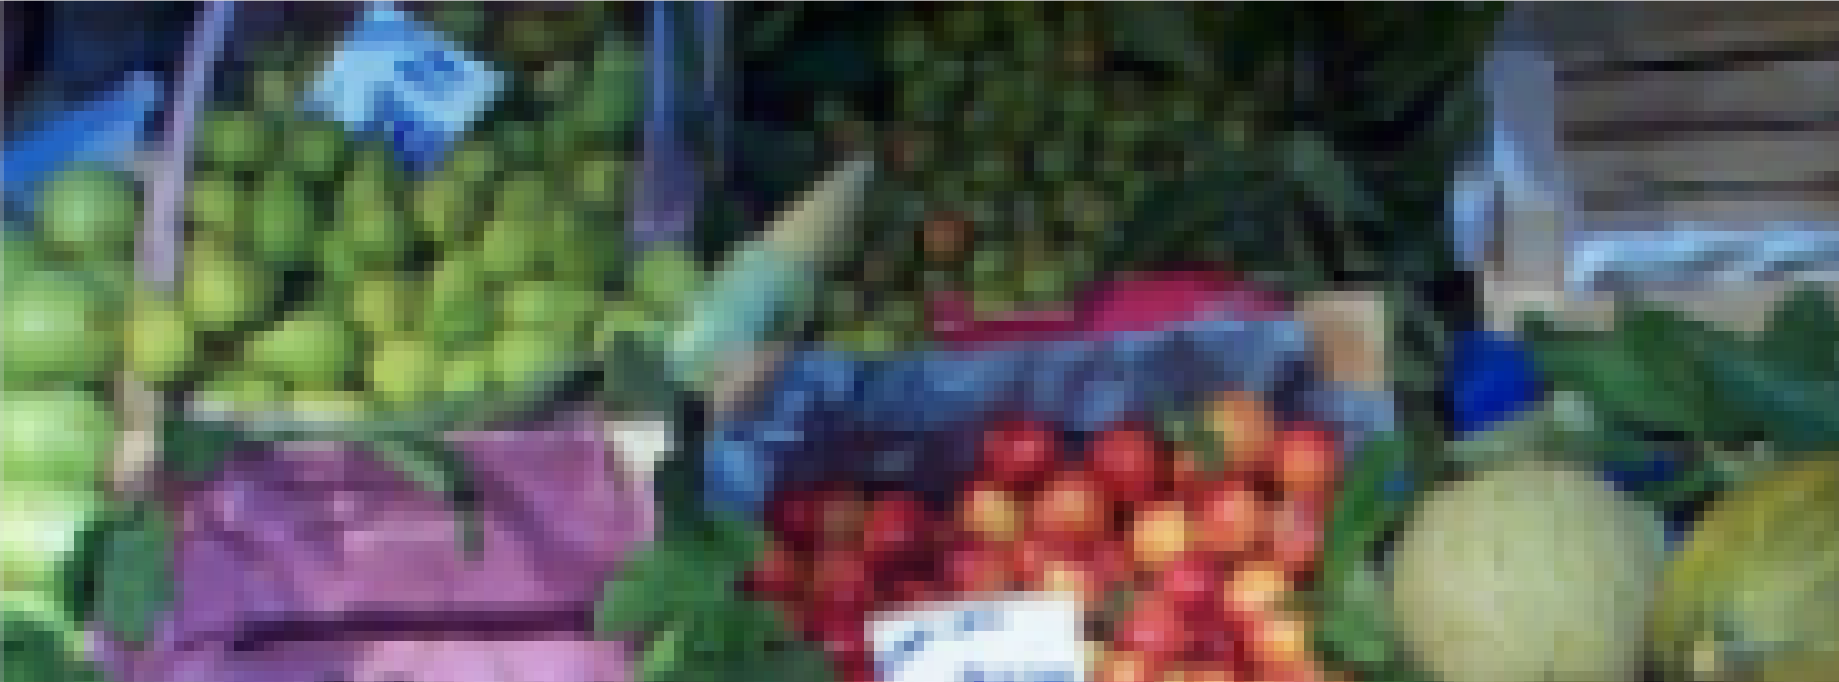

### FITS System


#### FITS (Flexible Image Transport System) is an open standard used for storing data in digital file format. 
#### FITS is commonly used in astronomical surveys, specifically for astronomical data, and includes photometric and spatial calibration information, together with image origin metadata.
#### FITS system is more than just a image format, and is maily used to store scientific data sets consisting of multidimensional arrays(images) and 2-D tables organized as rows and columns of information.

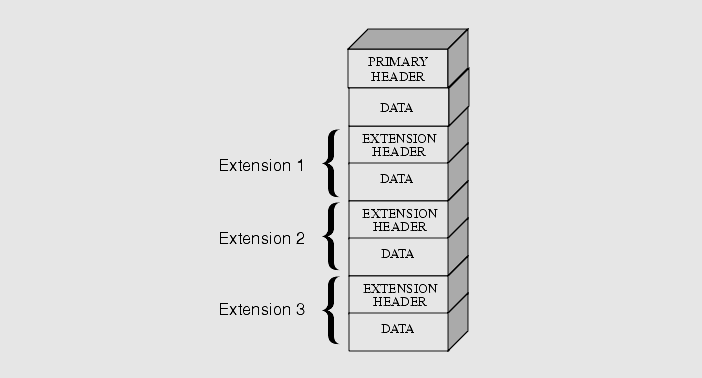

#### FITS system stores the data in the format of Header/Data Units (HDUs). In this, first HDU is called as primary HDU or primary array. This section contains a multi-dimentional(1-999) array of byte integers or floating point numbers using IEEE representations. A typical primary array could contain a 1-D spectrum, a 2-D image, or a 3-D data cube.

#### Read more about FITS file system - [FITS](https://fits.gsfc.nasa.gov/fits_primer.html)

### Introduction to Astroquery

#### Astroquery is a python library sepcifically designed for querying astronomical databases and web services. It allows reseachers an access to wide pool of astronomical data sources, such as Hubble Space Telescope, the Sloan Digital Sky Survey, NASA's Exoplanet Archive, and many others. Astroquery can seamlessly integrated with Astropy (python library that provides powerful data processing tools).

#### Astroquery handles data acquisition from various sources, while Astropy provides tools for detailed data analysis and manipulation.

In [10]:
#Installing Astroquery
%pip install astroquery

Note: you may need to restart the kernel to use updated packages.


#### Using Skyview class to fetch required data

In [11]:
#Importing required libraries
#SkyView class of astroquery library provides methods to get data of celestial coordinates from different surveys. 
from astroquery.skyview import SkyView
import matplotlib.pyplot as plt

In [12]:
#Getting the Andromeda galaxy data from SDSSs survey using Skyview class
hdu = SkyView.get_images("M31", "SDSSg")[0][0]
hdu

In [13]:
dir(hdu)

['_EXCLUDE',
 '_MASK',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_axes',
 '_bitpix',
 '_blank',
 '_bscale',
 '_buffer',
 '_bzero',
 '_calculate_checksum',
 '_calculate_datasum',
 '_char_encode',
 '_checksum',
 '_checksum_valid',
 '_close',
 '_compute_checksum',
 '_compute_hdu_checksum',
 '_convert_pseudo_integer',
 '_data_loaded',
 '_data_needs_rescale',
 '_data_offset',
 '_data_replaced',
 '_data_size',
 '_datasum',
 '_datasum_valid',
 '_default_name',
 '_do_not_scale_image_data',
 '_dtype_for_bitpix',
 '_encode_byte',
 '_file',
 '_from_data',
 '_gcount',
 '_get_raw_data',
 '_get_scaled_image_data',
 '_get_timestamp',
 '_has_data',
 '_hdu_regis

#### Getting into a data

In [14]:
#Header stores the metadata 
M31_header = hdu.header
hdu.header

SIMPLE  =                    T / Written by SkyView Wed Aug 07 21:54:24 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [15]:
#Data contains the array of pixel data from HDU
M31_data = hdu.data
hdu.data

array([[5.4453125, 5.453125 , 5.4453125, ..., 7.46875  , 7.5234375,
        7.25     ],
       [5.4375   , 5.453125 , 5.421875 , ..., 7.390625 , 7.390625 ,
        7.375    ],
       [5.4765625, 5.359375 , 5.4609375, ..., 7.453125 , 7.453125 ,
        7.6015625],
       ...,
       [7.3984375, 7.3984375, 7.546875 , ..., 5.53125  , 5.671875 ,
        5.7578125],
       [7.46875  , 7.6171875, 7.5859375, ..., 5.6640625, 5.671875 ,
        5.5625   ],
       [7.53125  , 7.5078125, 7.5859375, ..., 5.53125  , 5.59375  ,
        5.5546875]], dtype=float32)

In [16]:
#Checking the type of data we got from HDU
#type(M31_header)
type(M31_data)

numpy.ndarray

In [17]:
#Checking the shape of array
M31_data.shape

(300, 300)

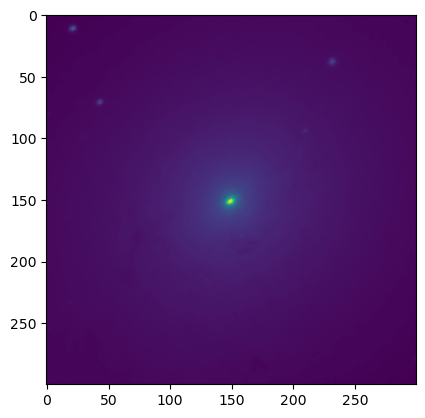

In [18]:
#Plotting the image based on survey data
#Here we are using imshow() function of matplotlib to display the grayscale image in a figure
#By default color map is viridis
plt.imshow(M31_data)

##### In above image we can see that y axis is inverted. We will use attribute origin (lower) in imshow function to make the appropriate changes. Also we can change the colormap to gray to get similar image as we got from online survey.

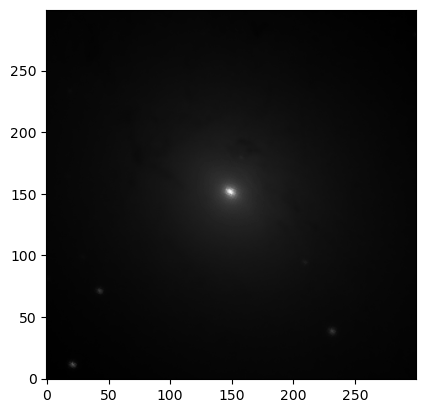

In [19]:
plt.imshow(M31_data, origin='lower', cmap= 'gray')

### Andromeda Galaxy with DSS2 Blue survey

#### In above fetched image, we used survey SDSSg to get the data. Now, we are using a different survey which gives us the more familiar image data of andromeda galaxy. 
#### Here we will be getting 600x600 pixel image to get better view of the astronomical objects. 
#### Also we are specifying the angular radius of M31 to have a wider and detailed view. We provide radius argument in arcminute unit.  


#### Astropy 
##### It is a widely used python library for astronomy and astrophysics. It provides functions such as unit conversion, performing arithmetic with physical quantities, handling logarithmic units such as magnitude and decibel. It provides classes for storing and manipulating structured astronomical data like star positions or astronomical catalogs.

In [20]:
#Here we are using astropy units package which provides arcmin that converts the given angle in arcminute.
import astropy.units as u

In [21]:
hdu = SkyView.get_images("M31", "DSS2 Blue",
                         pixels=600,
                         radius=150*u.arcmin)[0][0]

In [22]:
#Getting data from hdu in separate variable
M31_DSS2_Pixels = hdu.data
M31_DSS2_Pixels

array([[ 9129.,  9654.,  8932., ...,  8553., 10282.,  9129.],
       [ 9348.,  9511.,  8694., ...,  8862.,  8557.,  9007.],
       [ 8647., 13497.,  8787., ...,  8717.,  8862.,  9171.],
       ...,
       [10021.,  9664.,  9675., ...,  9435., 11916.,  9494.],
       [ 9820.,  9779.,  9783., ...,  9600.,  9659.,  9637.],
       [ 9740.,  9658.,  9448., ...,  9312.,  9612.,  9649.]],
      dtype=float32)

In [23]:
#Making sure the pixel size of data is as specified (600x600)
M31_DSS2_Pixels.shape

(600, 600)

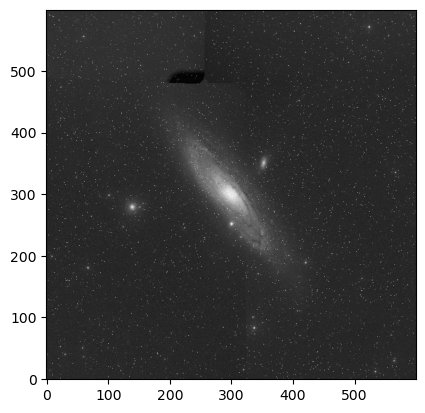

In [24]:
#Plotting the image
plt.imshow(M31_DSS2_Pixels, cmap='gray', origin='lower')